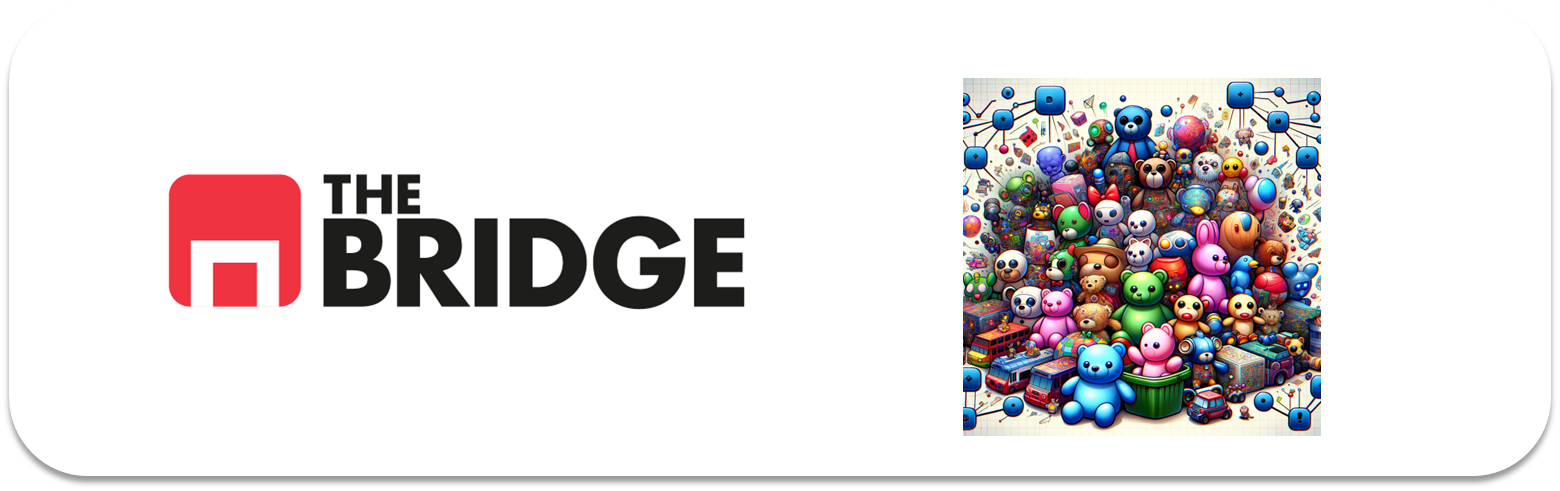

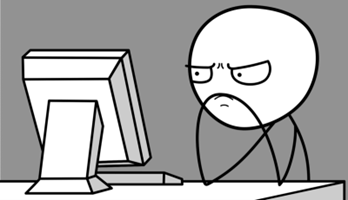

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [20]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [4]:
# Cargar el dataset
olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Mostrar la descripción del dataset
print(olivetti_faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [6]:
# Extraer las imágenes (X) y las etiquetas (y)
X = olivetti_faces.data  # Cada fila es una imagen aplanada de 4096 píxeles
y = olivetti_faces.target  # Etiquetas de las personas (0 a 39)

# Mostrar el target
print("Target:", y)

# Crear un DataFrame con las imágenes y el target
df = pd.DataFrame(X)
df["target"] = y  # Añadir la columna del target

# Reordenar aleatoriamente las imágenes
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostrar las primeras filas del DataFrame reordenado
print(df_shuffled.head())

Target: [20 28  3 21  9  8 32  9 26 12  0 36  5  7 13  4 27 37 23 38  7  1 39 27
  0 39 11 22 26 10 39 19 26  5 23 11 11 34 15 14 38  5  7  2  8 38 14 18
  2 17  4 32 33  7 37  3 22 17  3 15 12 29 25  7 10  3 35 26 39  7 32 14
  0  4 38 24 22 36 17 28  0  1 20 25 27  6 24 30 10  9 23 33 11 22 18 31
 37 38 23  7 24 11  1  6 15  0  1 13 35 34 13 38 29 38 29  6  7 28 30 28
 15 10  1 34  2 17 35 33 16 24 31 14 25 17 11 19 22 26 21 30  3 13 29 15
 19 28  5 11 16 36  0 33 27 15  1 19 10  8 31 39 37 20 28 16 35  8 37 16
 14 22  9  6 12  9 14 32  9 23  6  2  3 14 12 18  6 19 32 21 31 19 12 14
 37  8 33 34 33 35 33 30 18 20 28 21 28 12  3  1 32 18 22 11 17 32 29 11
 36 27 38 28 36 16 25 13 15 19 19 39  0 20 11 23 23  2 12 35 22 36 37 35
 37 12  7 32  2  8 38 10 24 29 13 24 18 29  4 36  6  8 24 18 15  1  3  2
 17 14 31 27 22  9  5 24 29 30 17  4 31 20 25 33  0 25 35 10 22 34 21 17
  9 21  6  4  3 26 20 35  2 31 23 26 28 16 37 13  6 13 12  0  6 30  1 15
  4 36 32 21 27 34 23 20 21 29 36 25 39 36 

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [8]:
# Primera división: 90% entrenamiento+validación, 10% prueba (estratificado por target)
df_train_val, df_test = train_test_split(df_shuffled, test_size=0.1, stratify=df_shuffled["target"], random_state=42)

# Segunda división: 80% entrenamiento, 10% validación (a partir del 90% original)
df_train, df_val = train_test_split(df_train_val, test_size=1/9, stratify=df_train_val["target"], random_state=42)

# Mostrar el tamaño de cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {df_train.shape}")
print(f"Tamaño del conjunto de validación: {df_val.shape}")
print(f"Tamaño del conjunto de prueba: {df_test.shape}")

Tamaño del conjunto de entrenamiento: (320, 4097)
Tamaño del conjunto de validación: (40, 4097)
Tamaño del conjunto de prueba: (40, 4097)


### #1.4

Crea los pares X,y para train, validation y test.

In [9]:
# Separar features (X) y target (y) para cada conjunto
X_train, y_train = df_train.drop(columns=["target"]), df_train["target"]
X_val, y_val = df_val.drop(columns=["target"]), df_val["target"]
X_test, y_test = df_test.drop(columns=["target"]), df_test["target"]

# Mostrar las dimensiones de cada conjunto
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (320, 4096), y_train: (320,)
X_val: (40, 4096), y_val: (40,)
X_test: (40, 4096), y_test: (40,)


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

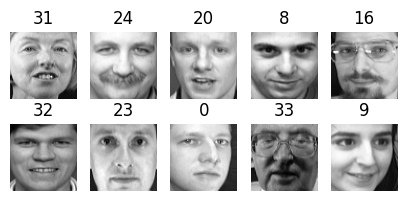

In [11]:
# Función para visualizar las caras
def plot_faces(faces, labels, n_cols=5):
    faces = faces.to_numpy().reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

# Visualizar algunas imágenes del conjunto de entrenamiento
plot_faces(X_train.iloc[:10], y_train.iloc[:10])

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [13]:
from sklearn.decomposition import PCA

# Aplicar PCA conservando el 99% de la varianza
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Mostrar el número de componentes principales seleccionados
print(f"Número de componentes seleccionados: {pca.n_components_}")

Número de componentes seleccionados: 221


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [16]:
# Encontrar el mejor número de clusters K usando el score de silueta
best_k = 0
best_score = -1
k_values = range(5, 151, 5)  # Probar valores de K de 5 en 5 hasta 150
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    score = silhouette_score(X_train_pca, cluster_labels)
    silhouette_scores.append(score)
    
    if score > best_score:
        best_k = k
        best_score = score

# Mostrar el mejor K encontrado
print(f"Mejor K: {best_k} con un score de silueta de {best_score:.4f}")


Mejor K: 115 con un score de silueta de 0.2192


### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

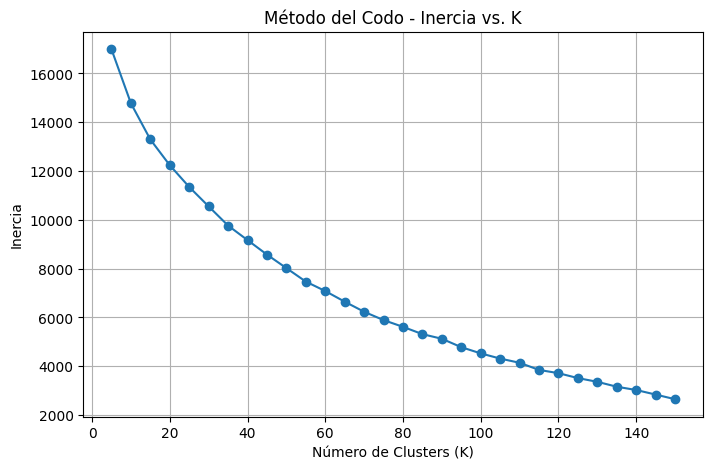

In [17]:
# Lista para almacenar la inercia de cada K
inertia_values = []
k_values = range(5, 151, 5)  # Probar valores de K de 5 en 5 hasta 150

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)
    inertia_values.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo - Inercia vs. K")
plt.grid(True)
plt.show()

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [18]:
# Entrenar el modelo K-Means con el mejor k encontrado
best_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)
best_model.fit(X_train_pca)

KMeans(n_clusters=115, n_init=10, random_state=42)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

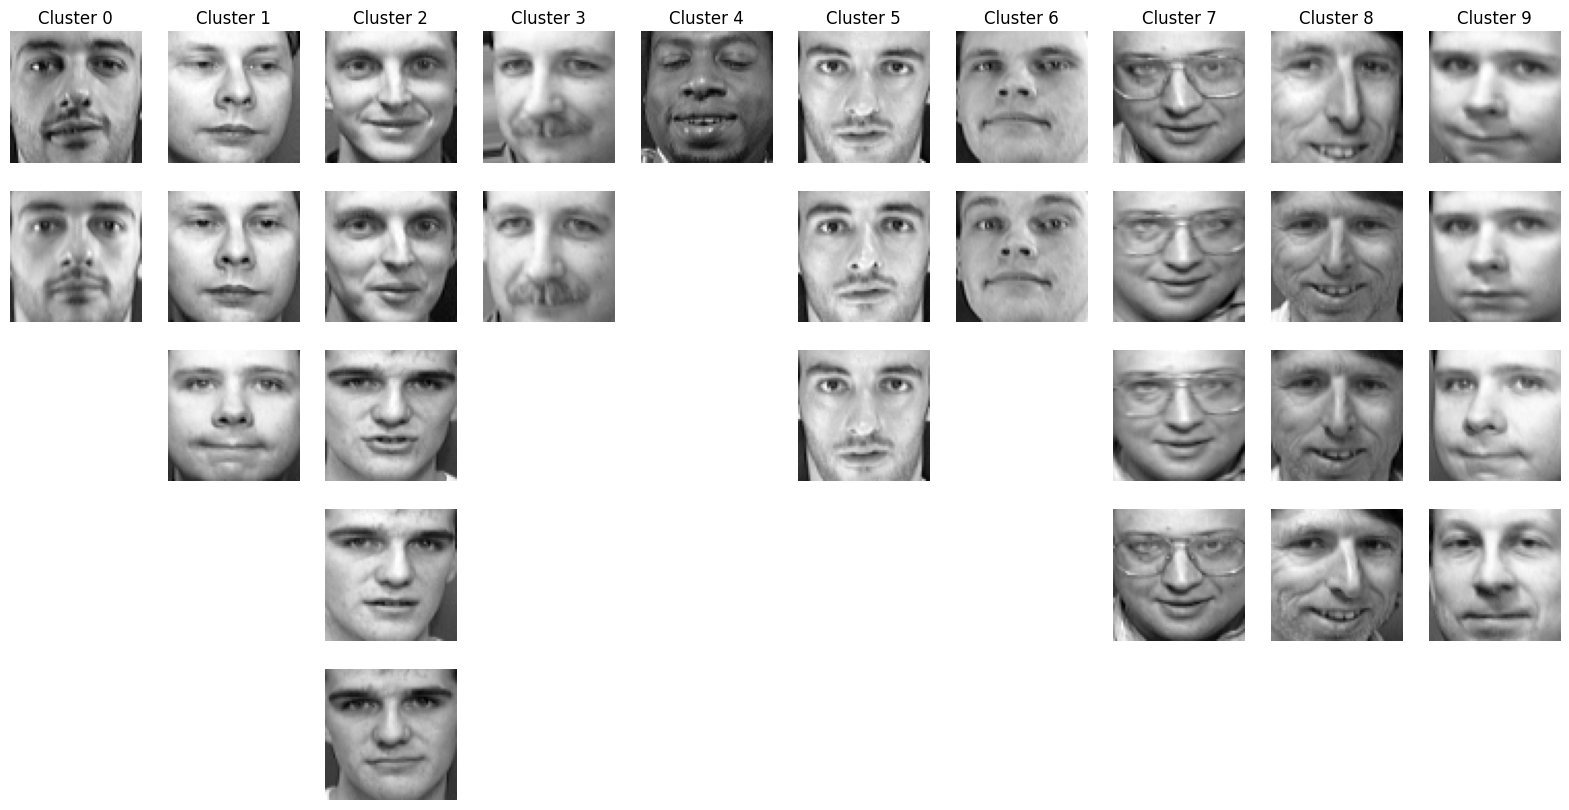

In [19]:
# Obtener las etiquetas asignadas por el modelo
cluster_labels = best_model.labels_

# Agregar las etiquetas al dataframe original de entrenamiento (sin PCA)
df_train_clustered = df_train.copy()
df_train_clustered["cluster"] = cluster_labels

# Función para visualizar las imágenes de los primeros 10 clusters
def plot_clusters(df, clusters_to_show=10, images_per_cluster=5):
    plt.figure(figsize=(clusters_to_show * 2, images_per_cluster * 2))
    for cluster in range(clusters_to_show):
        cluster_images = df[df["cluster"] == cluster].drop(columns=["target", "cluster"]).to_numpy()
        cluster_images = cluster_images[:images_per_cluster].reshape(-1, 64, 64)
        
        for i, img in enumerate(cluster_images):
            plt.subplot(images_per_cluster, clusters_to_show, i * clusters_to_show + cluster + 1)
            plt.imshow(img, cmap="gray")
            plt.axis("off")
            if i == 0:
                plt.title(f"Cluster {cluster}")
    plt.show()

# Visualizar las caras agrupadas en los 10 primeros clústeres
plot_clusters(df_train_clustered, clusters_to_show=10, images_per_cluster=5)

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [21]:
# Entrenar el modelo RandomForest con 150 estimadores
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)

# Predecir en el conjunto de validación
y_val_pred = clf.predict(X_val_pca)

# Evaluar la precisión en validación
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Precisión en validación: {val_accuracy:.4f}")

Precisión en validación: 0.9750


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [22]:
# Reducir las features usando K-Means (distancias a centroides)
X_train_reduced = best_model.transform(X_train_pca)
X_val_reduced = best_model.transform(X_val_pca)

# Entrenar un nuevo clasificador en el conjunto reducido
clf_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
clf_reduced.fit(X_train_reduced, y_train)

# Predecir en el conjunto de validación reducido
y_val_pred_reduced = clf_reduced.predict(X_val_reduced)

# Evaluar la precisión en validación
val_accuracy_reduced = accuracy_score(y_val, y_val_pred_reduced)
val_accuracy_reduced

0.675

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

In [24]:
# Definir el rango de valores de k a probar
k_values = range(5, 151, 5)
best_k = None
best_accuracy = 0

# Probar diferentes valores de k y evaluar el rendimiento del clasificador
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)  # Entrenar K-Means en el conjunto reducido por PCA
    
    # Transformamos los datos en distancias a los centroides
    X_train_reduced = kmeans.transform(X_train_pca)
    X_val_reduced = kmeans.transform(X_val_pca)
    
    # Entrenar el clasificador RandomForest
    clf = RandomForestClassifier(n_estimators=150, random_state=42)
    clf.fit(X_train_reduced, y_train)
    
    # Evaluar el modelo en validación
    y_val_pred = clf.predict(X_val_reduced)
    accuracy = accuracy_score(y_val, y_val_pred)
    
    # Guardar el mejor k encontrado
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Mostrar el mejor k y su rendimiento
print(f"Mejor k: {best_k}, Mejor Accuracy: {best_accuracy:.4f}")

Mejor k: 55, Mejor Accuracy: 0.7500
